In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
PATH = '/home/xk/jp/data/'

dit = pd.read_json(PATH+'dit_log.json')
dit = pd.DataFrame.from_records(dit['dit_log'])

susp = pd.read_json(PATH+'susp_ip.json')
susp = pd.DataFrame.from_records(susp['susp_ip'])
print(dit.shape)
dit.POST_Size = pd.to_numeric(dit.POST_Size, errors='coerce').fillna(0)
dit.Resp1Len = pd.to_numeric(dit.Resp1Len, errors='coerce').fillna(0)
dit

(201113, 20)


,Browser,CallA,Call_Orig,Call_Type,Date_Time,From_,IP_Client,IP_Front,POST_Size,Resp1,Resp1Len,Resp2,Server_URL,attach_,draft_ID,draft_name,id,onsite_from,revocation,underscore
0,"""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:55.0) ...",GET /ru/application/dtiu/030301/?load_app=1&dr...,GET /ru/application/dtiu/030301/?load_app=1&dr...,GET,2017-09-05 00:00:39,https://www.mos.ru/pgu/ru/drafts/,77.37.151.166,10.89.84.252,1607,0,34,401,172.16.164.210:9000,0,53281187,,1,0,0,
1,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",GET /ru/application/dtiu/030301/?attach=$,GET /ru/application/dtiu/030301/?attach=841988...,GET,2017-09-05 00:00:49,https://my.mos.ru/my/,83.149.46.228,10.89.84.251,2023,0,34,401,172.16.164.196:9000,84198879,0,,2,0,0,
2,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",GET /ru/application/dtiu/030301/,GET /ru/application/dtiu/030301/ HTTP/1.1,GET,2017-09-05 00:00:53,-,185.19.22.0,10.89.84.252,1699,0,36594,200,172.16.164.210:9000,0,0,,3,0,0,
3,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",GET /common/ajax/?ajaxModule=popup&ajaxAction=...,GET /common/ajax/?ajaxModule=popup&ajaxAction=...,GET,2017-09-05 00:00:53,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1754,0,114,200,172.16.164.195:9000,0,0,,4,0,0,
4,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 00:00:54,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1861,0,72,200,172.16.164.195:9000,0,0,,5,0,0,
5,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 00:00:54,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1864,0,192,200,172.16.164.211:9000,0,0,,6,0,0,
6,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 00:00:54,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1866,0,2297,200,172.16.164.196:9000,0,0,,7,0,0,
7,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /common/ajax/index.php,POST /common/ajax/index.php HTTP/1.1,POST,2017-09-05 00:00:54,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1851,0,250080,200,172.16.164.196:9000,0,0,,8,0,0,
8,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 00:00:54,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.19.22.0,10.89.84.252,1863,0,6229,200,172.16.164.210:9000,0,0,,9,0,0,
9,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",GET /ru/application/dtiu/030301/?attach=$,GET /ru/application/dtiu/030301/?attach=841817...,GET,2017-09-05 00:01:04,https://my.mos.ru/my/,94.158.176.39,10.89.84.251,2256,0,34,401,172.16.164.210:9000,84181711,0,,10,0,0,


In [33]:
clients = dit['IP_Client'].drop_duplicates()
dit.groupby(['IP_Client'])['IP_Client'].count().sort_values()[-21:]
clients

0           77.37.151.166
1           83.149.46.228
2             185.19.22.0
9           94.158.176.39
11          176.14.179.63
13          213.171.63.69
14           95.73.220.62
25         109.172.46.225
26         109.252.52.243
27         37.110.145.134
29           91.77.85.136
30          77.232.15.145
39           217.66.156.4
46          90.155.192.85
48          31.173.86.127
49           31.173.84.98
51           79.104.4.201
53          31.173.83.106
63          213.87.154.12
68          91.79.106.130
70          95.72.227.202
75         185.143.88.229
77           95.37.24.143
78         176.195.74.168
96          95.91.228.136
97         188.255.118.43
100         46.242.97.254
101        109.173.10.142
111          46.39.50.247
119           93.81.76.14
               ...       
107672      193.169.20.69
108017     185.182.81.137
110068     193.192.52.154
110382     91.212.151.134
110607       194.85.58.57
116593     109.206.156.32
118291     195.211.23.224
125457      

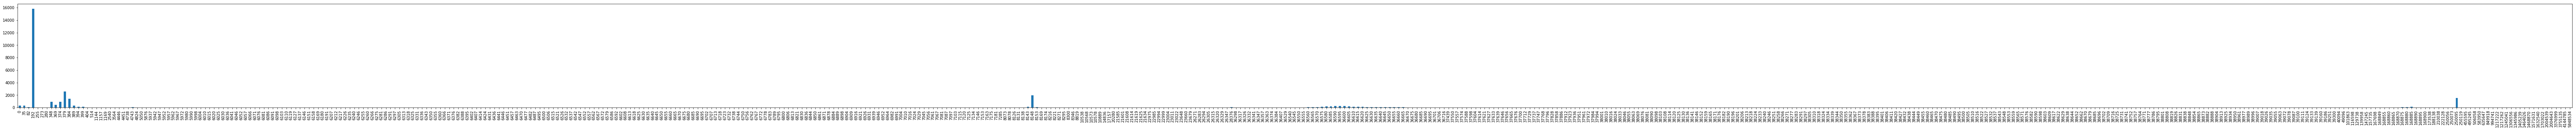

In [4]:
c = dit.Resp1Len.value_counts().sort_index()
c[::len(c)//500].plot(figsize=(120,5), kind='bar')
plt.show()

In [139]:
#regs = dit[(dit['POST_Size'] > 10000) & (dit['Resp1Len']>8000) & (dit['Resp1Len']<8400)]
regs = dit[(dit['POST_Size'] > 45000) ]

regs_total = regs.groupby(['IP_Client'])['IP_Client'].count().sort_values()
regs_total.sort_values(ascending=False).to_frame()[:20]
reqs = dit.groupby(['IP_Client'])['IP_Client'].count().sort_values()
reqs.sort_values(ascending=False).to_frame()[:20]

,IP_Client
IP_Client,
217.26.10.138,6027
5.188.139.124,2614
185.105.103.177,2359
185.106.93.176,1061
95.81.196.4,872
109.252.93.242,624
109.252.71.109,620
213.87.131.175,551
91.212.151.248,532


In [20]:
regs.sort_values(['Date_Time'])

,Browser,CallA,Call_Orig,Call_Type,Date_Time,From_,IP_Client,IP_Front,POST_Size,Resp1,Resp1Len,Resp2,Server_URL,attach_,draft_ID,draft_name,id,onsite_from,revocation,underscore
12286,"""Mozilla/5.0 (Windows NT 6.2; Win64; x64) Appl...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:58:55,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.61.246.233,10.89.84.251,46666,0,8145,200,172.16.164.211:9000,0,0,,6464,0,0,
112972,"""Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS ...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:58:55,https://www.mos.ru/pgu/ru/application/dtiu/030...,109.238.80.53,10.89.84.252,43060,0,8144,200,172.16.164.211:9000,0,0,,107131,0,0,
12497,"""Mozilla/5.0 (Windows NT 6.1; Win64; x64) Appl...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:08,https://www.mos.ru/pgu/ru/application/dtiu/030...,217.151.77.91,10.89.84.252,41009,0,8150,200,172.16.164.210:9000,0,0,,6675,0,0,
12633,"""Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWeb...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:15,https://www.mos.ru/pgu/ru/application/dtiu/030...,79.165.24.139,10.89.84.251,46459,0,8143,200,172.16.164.210:9000,0,0,,6809,0,0,
113361,"""Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:17,https://www.mos.ru/pgu/ru/application/dtiu/030...,176.59.55.61,10.89.84.252,48701,0,8151,200,172.16.164.211:9000,0,0,,107520,0,0,
113415,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:20,https://www.mos.ru/pgu/ru/application/dtiu/030...,5.254.65.15,10.89.84.252,42900,0,8148,200,172.16.164.210:9000,0,0,,107575,0,0,
12704,"""Mozilla/5.0 (Windows NT 6.1; Win64; x64) Appl...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:21,https://www.mos.ru/pgu/ru/application/dtiu/030...,178.75.69.35,10.89.84.252,47955,0,8145,200,172.16.164.210:9000,0,0,,6881,0,0,
12732,"""Mozilla/5.0 (Windows NT 6.3; Win64; x64) Appl...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:22,https://www.mos.ru/pgu/ru/application/dtiu/030...,178.68.9.48,10.89.84.251,56707,0,8145,200,172.16.164.211:9000,0,0,,6910,0,0,
113452,"""Mozilla/5.0 (Windows NT 6.2; Win64; x64) Appl...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:22,https://www.mos.ru/pgu/ru/application/dtiu/030...,185.61.246.233,10.89.84.252,46666,0,8148,200,172.16.164.195:9000,0,0,,107610,0,0,
113477,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",POST /ru/application/dtiu/030301/,POST /ru/application/dtiu/030301/ HTTP/1.1,POST,2017-09-05 08:59:23,https://www.mos.ru/pgu/ru/application/dtiu/030...,109.238.95.1,10.89.84.252,44242,0,8148,200,172.16.164.195:9000,0,0,,107634,0,0,


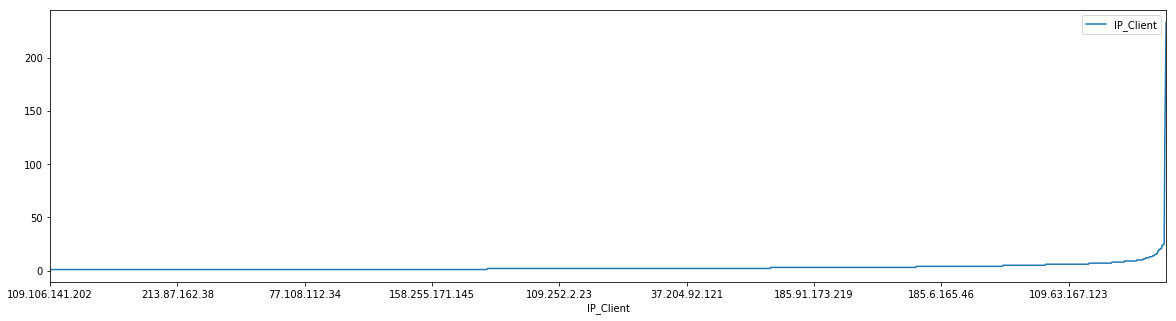

In [134]:
regs_total.plot(figsize=(20,5))
plt.show()

IP:  95.27.225.126
TOTAL REQS:  IP_Client       119.0
POST_Size    893706.0
dtype: float64


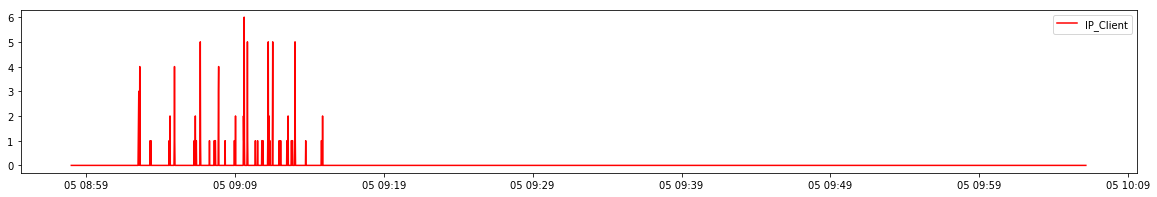

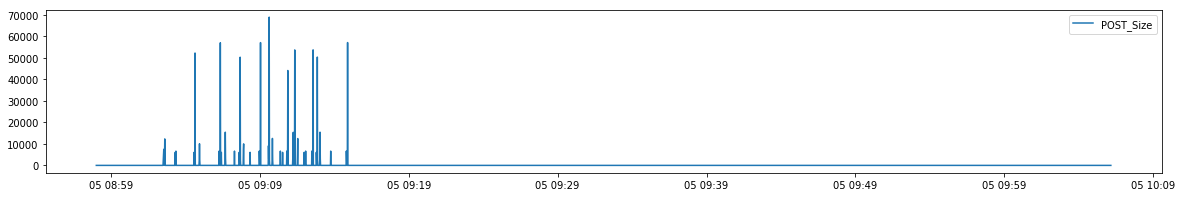

                     IP_Client
Date_Time                     
2017-09-05 09:04:38          1
2017-09-05 09:06:20          1
2017-09-05 09:07:40          1
2017-09-05 09:09:02          1
2017-09-05 09:09:37          1
2017-09-05 09:10:52          1
2017-09-05 09:11:20          1
2017-09-05 09:12:34          1
2017-09-05 09:12:51          1
2017-09-05 09:14:53          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:04:38'), Timestamp('2017-09-05 09:14:53'))


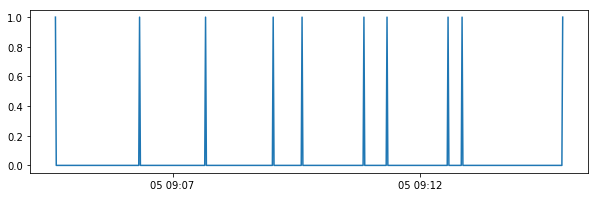

IP:  93.124.92.136
TOTAL REQS:  IP_Client       142.0
POST_Size    887597.0
dtype: float64


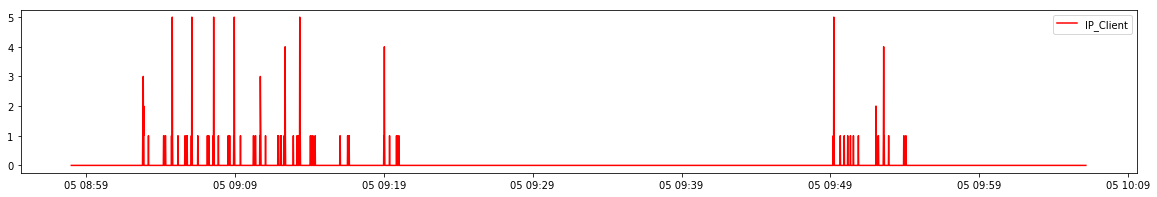

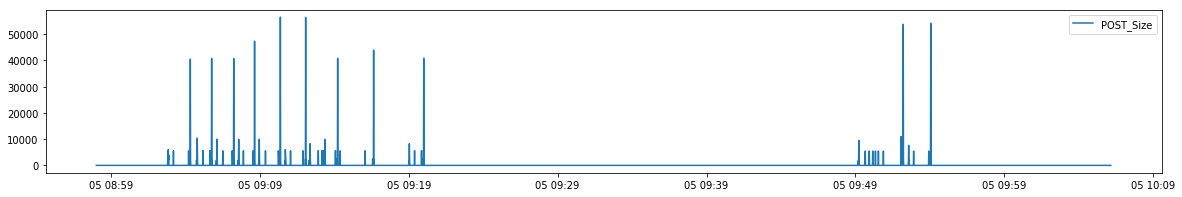

                     IP_Client
Date_Time                     
2017-09-05 09:04:19          1
2017-09-05 09:05:45          1
2017-09-05 09:07:14          1
2017-09-05 09:08:38          1
2017-09-05 09:10:22          1
2017-09-05 09:12:04          1
2017-09-05 09:14:13          1
2017-09-05 09:16:38          1
2017-09-05 09:20:00          1
2017-09-05 09:52:13          1
2017-09-05 09:54:04          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:04:19'), Timestamp('2017-09-05 09:54:04'))


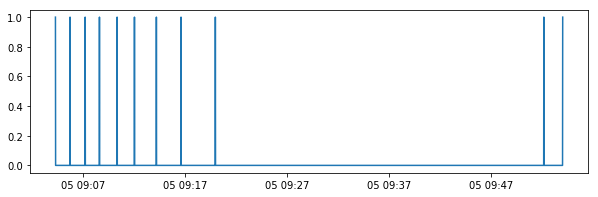

IP:  109.252.29.54
TOTAL REQS:  IP_Client       134.0
POST_Size    954702.0
dtype: float64


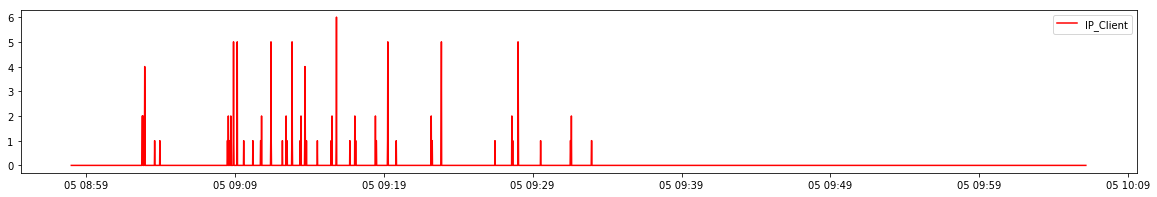

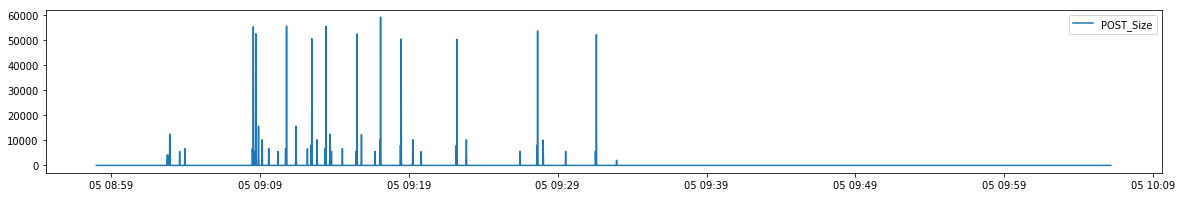

                     IP_Client
Date_Time                     
2017-09-05 09:08:33          1
2017-09-05 09:08:43          1
2017-09-05 09:10:47          1
2017-09-05 09:12:29          1
2017-09-05 09:13:26          1
2017-09-05 09:15:31          1
2017-09-05 09:17:06          1
2017-09-05 09:18:29          1
2017-09-05 09:22:14          1
2017-09-05 09:27:39          1
2017-09-05 09:31:36          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:08:33'), Timestamp('2017-09-05 09:31:36'))


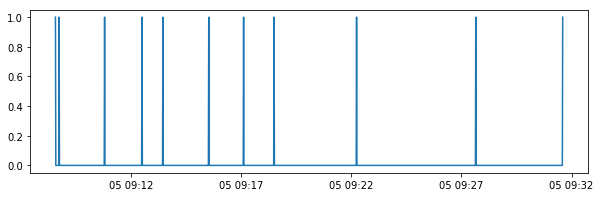

IP:  91.246.95.184
TOTAL REQS:  IP_Client        165.0
POST_Size    1151272.0
dtype: float64


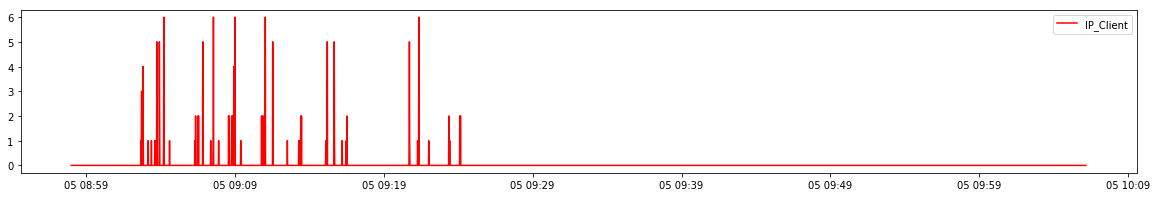

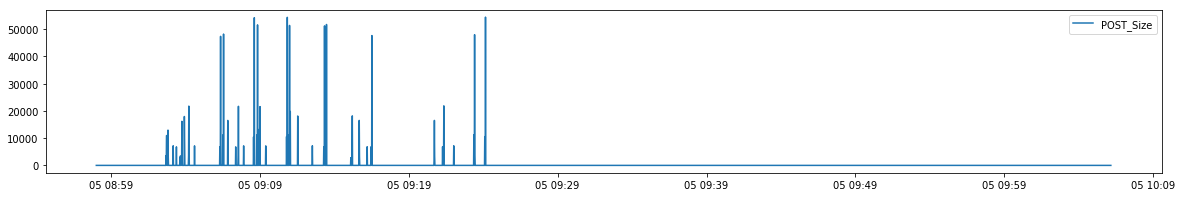

                     IP_Client
Date_Time                     
2017-09-05 09:06:21          1
2017-09-05 09:06:33          1
2017-09-05 09:08:37          1
2017-09-05 09:08:50          1
2017-09-05 09:10:50          1
2017-09-05 09:10:59          1
2017-09-05 09:13:20          1
2017-09-05 09:13:28          1
2017-09-05 09:16:31          1
2017-09-05 09:23:25          1
2017-09-05 09:24:09          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:06:21'), Timestamp('2017-09-05 09:24:09'))


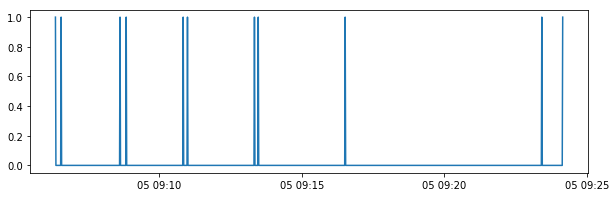

IP:  109.252.80.13
TOTAL REQS:  IP_Client       177.0
POST_Size    891885.0
dtype: float64


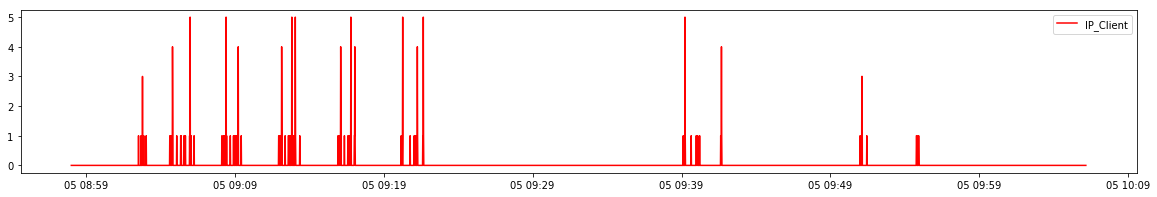

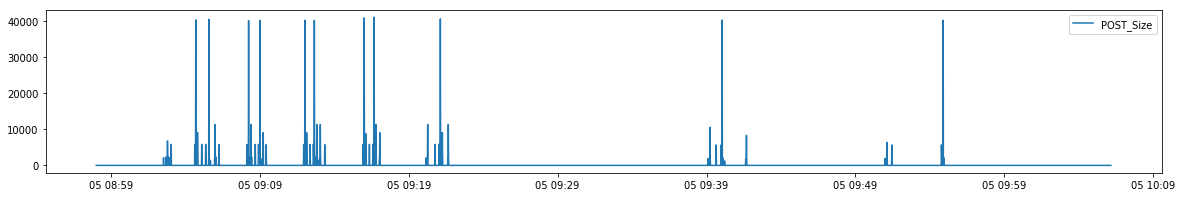

                     IP_Client
Date_Time                     
2017-09-05 09:04:41          1
2017-09-05 09:05:34          1
2017-09-05 09:08:14          1
2017-09-05 09:09:00          1
2017-09-05 09:12:01          1
2017-09-05 09:12:39          1
2017-09-05 09:16:00          1
2017-09-05 09:16:40          1
2017-09-05 09:21:07          1
2017-09-05 09:40:03          1
2017-09-05 09:54:54          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:04:41'), Timestamp('2017-09-05 09:54:54'))


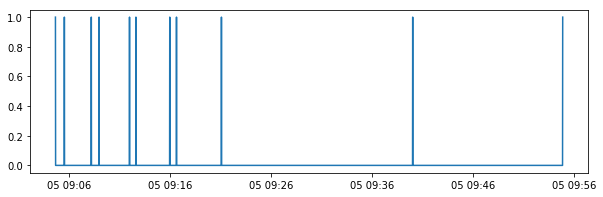

IP:  95.29.111.38
TOTAL REQS:  IP_Client       183.0
POST_Size    948667.0
dtype: float64


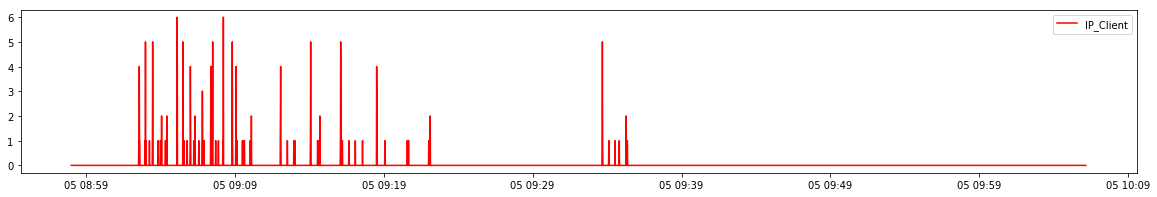

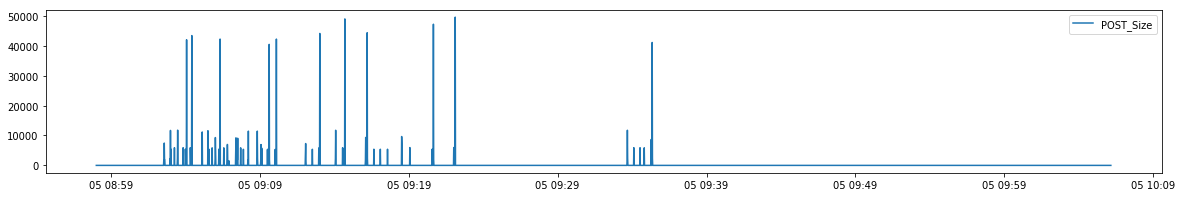

                     IP_Client
Date_Time                     
2017-09-05 09:04:04          1
2017-09-05 09:04:25          1
2017-09-05 09:06:19          1
2017-09-05 09:09:37          1
2017-09-05 09:10:06          1
2017-09-05 09:13:01          1
2017-09-05 09:14:42          1
2017-09-05 09:16:12          1
2017-09-05 09:20:39          1
2017-09-05 09:22:07          1
2017-09-05 09:35:21          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:04:04'), Timestamp('2017-09-05 09:35:21'))


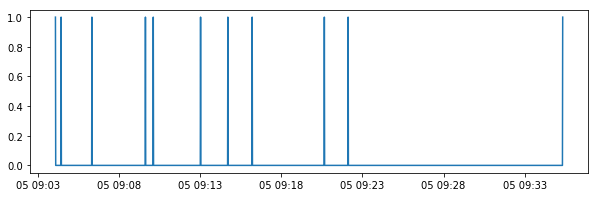

IP:  158.255.133.78
TOTAL REQS:  IP_Client        204.0
POST_Size    1124514.0
dtype: float64


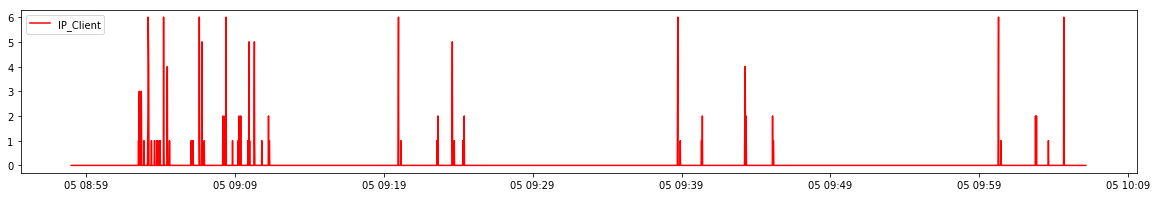

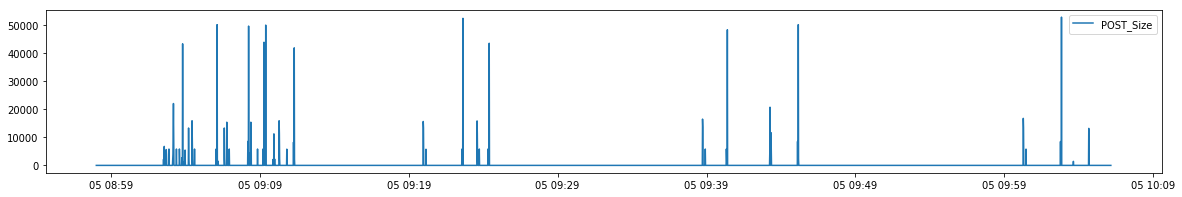

                     IP_Client
Date_Time                     
2017-09-05 09:03:48          1
2017-09-05 09:06:07          1
2017-09-05 09:08:14          1
2017-09-05 09:09:16          1
2017-09-05 09:09:23          1
2017-09-05 09:11:18          1
2017-09-05 09:22:38          1
2017-09-05 09:24:24          1
2017-09-05 09:40:24          1
2017-09-05 09:45:10          1
2017-09-05 10:02:51          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:03:48'), Timestamp('2017-09-05 10:02:51'))


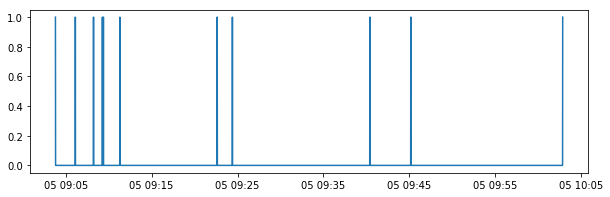

IP:  217.118.95.67
TOTAL REQS:  IP_Client       139.0
POST_Size    777157.0
dtype: float64


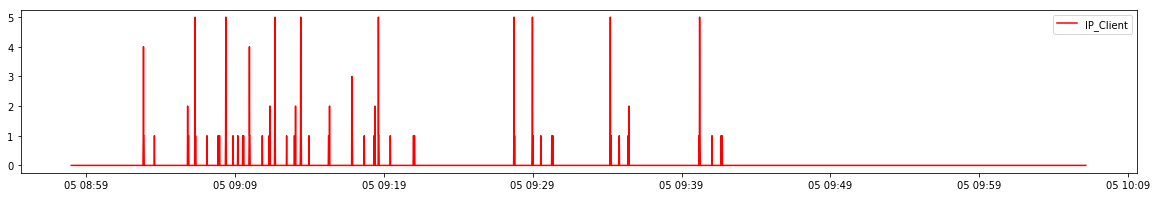

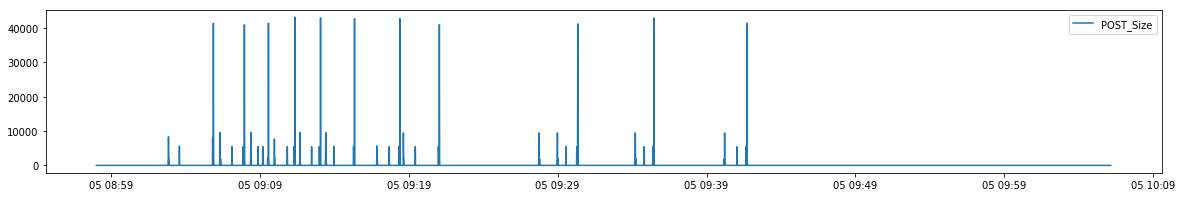

                     IP_Client
Date_Time                     
2017-09-05 09:05:52          1
2017-09-05 09:07:57          1
2017-09-05 09:09:34          1
2017-09-05 09:11:21          1
2017-09-05 09:13:04          1
2017-09-05 09:15:21          1
2017-09-05 09:18:24          1
2017-09-05 09:21:03          1
2017-09-05 09:30:21          1
2017-09-05 09:35:28          1
2017-09-05 09:41:43          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:05:52'), Timestamp('2017-09-05 09:41:43'))


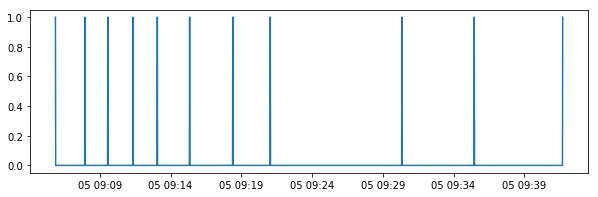

IP:  95.73.220.62
TOTAL REQS:  IP_Client        224.0
POST_Size    1118684.0
dtype: float64


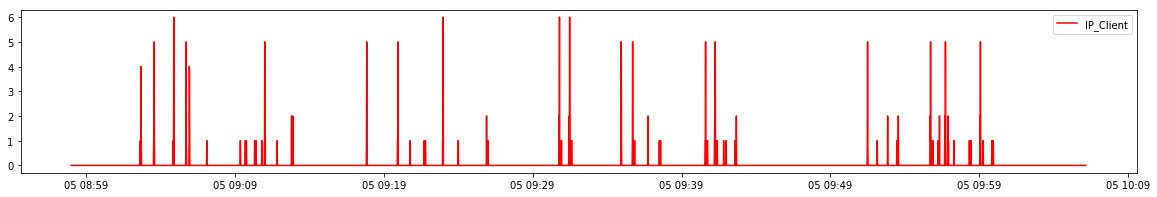

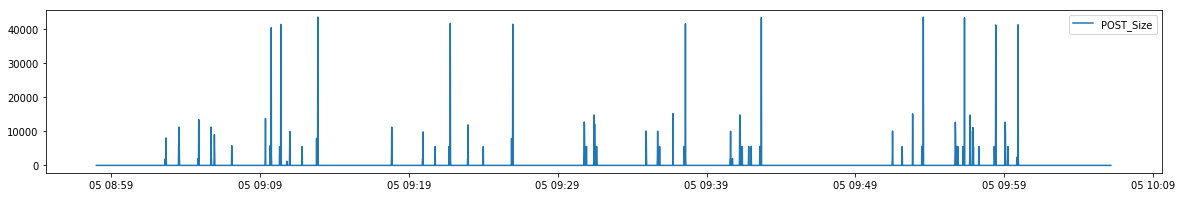

                     IP_Client
Date_Time                     
2017-09-05 09:09:45          1
2017-09-05 09:10:24          1
2017-09-05 09:12:53          1
2017-09-05 09:21:47          1
2017-09-05 09:25:59          1
2017-09-05 09:37:35          1
2017-09-05 09:42:41          1
2017-09-05 09:53:34          1
2017-09-05 09:56:20          1
2017-09-05 09:58:26          1
2017-09-05 09:59:56          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:09:45'), Timestamp('2017-09-05 09:59:56'))


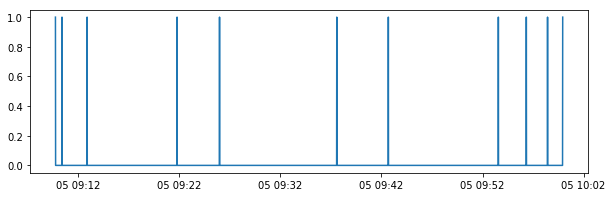

IP:  5.227.180.177
TOTAL REQS:  IP_Client       139.0
POST_Size    794012.0
dtype: float64


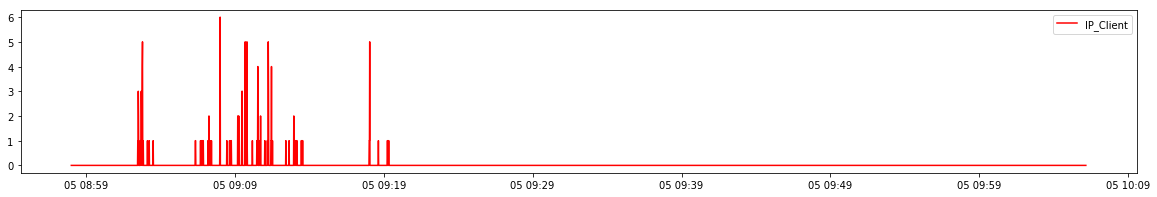

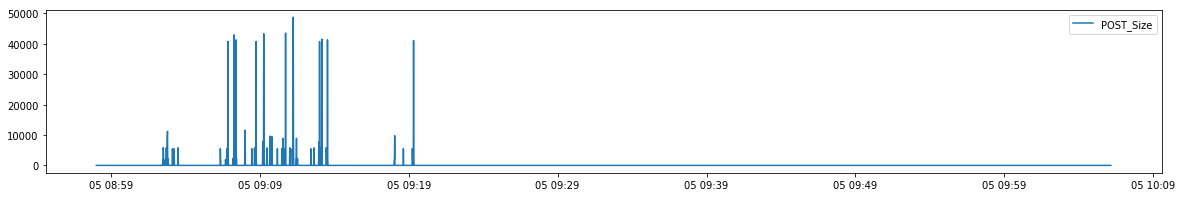

                     IP_Client
Date_Time                     
2017-09-05 09:06:51          1
2017-09-05 09:07:15          1
2017-09-05 09:07:23          1
2017-09-05 09:08:44          1
2017-09-05 09:09:15          1
2017-09-05 09:10:43          1
2017-09-05 09:11:14          1
2017-09-05 09:13:00          1
2017-09-05 09:13:09          1
2017-09-05 09:13:32          1
2017-09-05 09:19:19          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:06:51'), Timestamp('2017-09-05 09:19:19'))


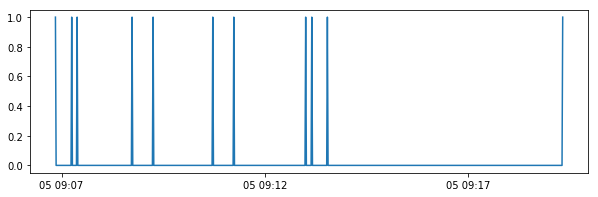

IP:  109.172.46.121
TOTAL REQS:  IP_Client        151.0
POST_Size    1032024.0
dtype: float64


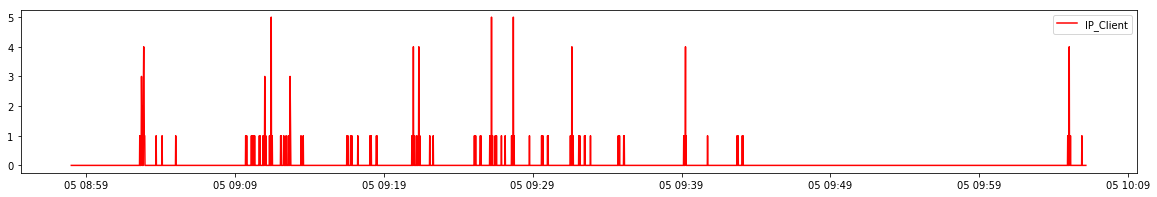

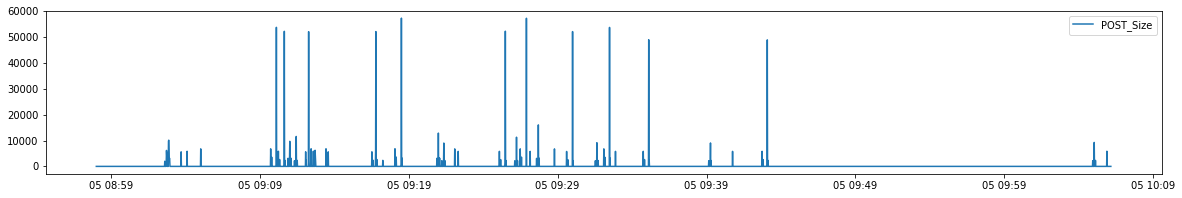

                     IP_Client
Date_Time                     
2017-09-05 09:10:06          1
2017-09-05 09:10:38          1
2017-09-05 09:12:16          1
2017-09-05 09:16:47          1
2017-09-05 09:18:30          1
2017-09-05 09:25:29          1
2017-09-05 09:26:54          1
2017-09-05 09:30:00          1
2017-09-05 09:32:29          1
2017-09-05 09:35:07          1
2017-09-05 09:43:05          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:10:06'), Timestamp('2017-09-05 09:43:05'))


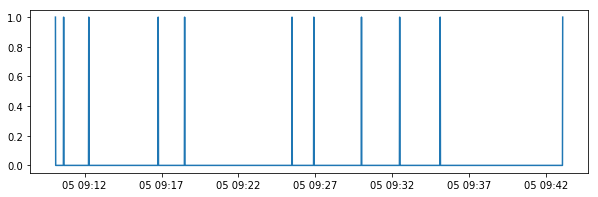

IP:  79.139.137.198
TOTAL REQS:  IP_Client       161.0
POST_Size    833274.0
dtype: float64


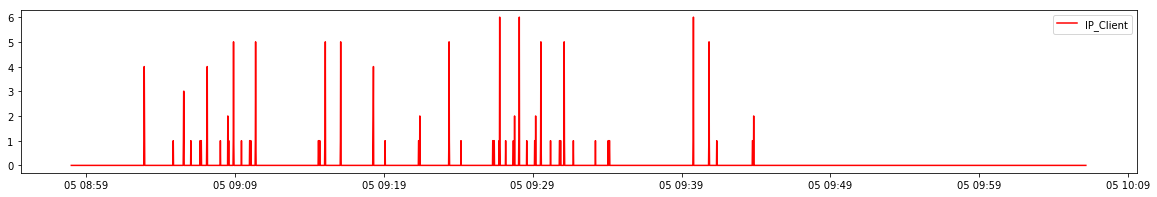

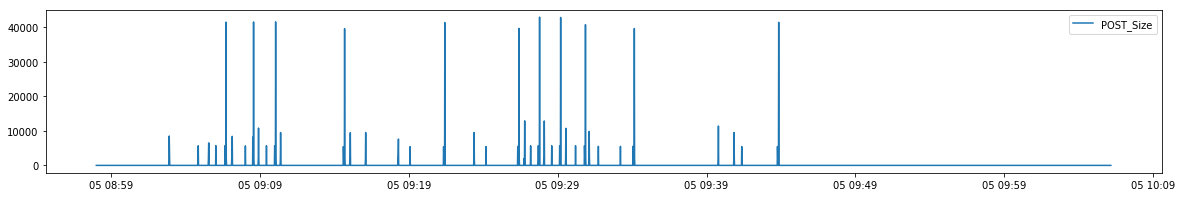

                     IP_Client
Date_Time                     
2017-09-05 09:06:43          1
2017-09-05 09:08:34          1
2017-09-05 09:10:03          1
2017-09-05 09:14:41          1
2017-09-05 09:21:25          1
2017-09-05 09:26:24          1
2017-09-05 09:27:47          1
2017-09-05 09:29:12          1
2017-09-05 09:30:52          1
2017-09-05 09:34:09          1
2017-09-05 09:43:51          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:06:43'), Timestamp('2017-09-05 09:43:51'))


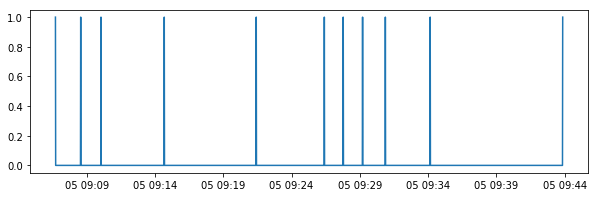

IP:  109.61.206.33
TOTAL REQS:  IP_Client        196.0
POST_Size    1069298.0
dtype: float64


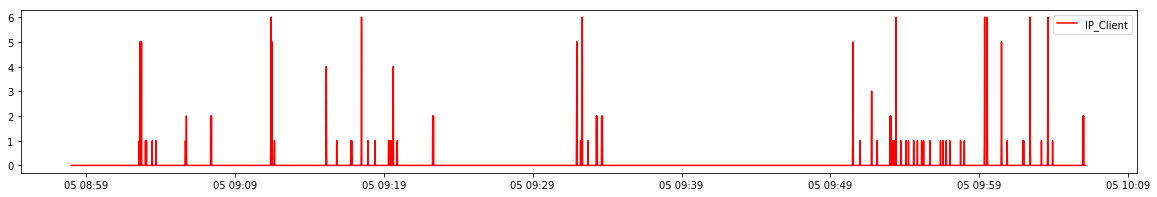

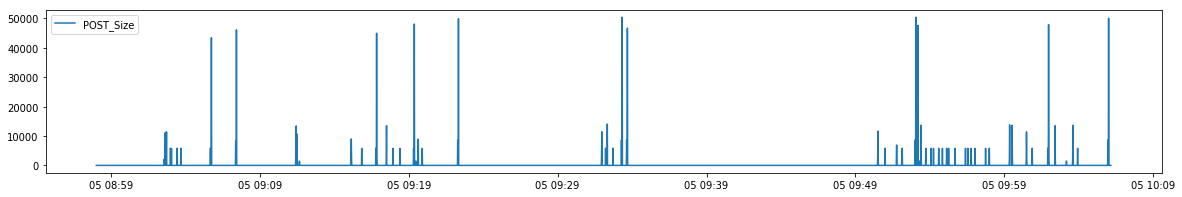

                     IP_Client
Date_Time                     
2017-09-05 09:05:44          1
2017-09-05 09:07:25          1
2017-09-05 09:16:50          1
2017-09-05 09:19:22          1
2017-09-05 09:22:20          1
2017-09-05 09:33:20          1
2017-09-05 09:33:41          1
2017-09-05 09:53:04          1
2017-09-05 09:53:12          1
2017-09-05 10:01:59          1
2017-09-05 10:06:01          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:05:44'), Timestamp('2017-09-05 10:06:01'))


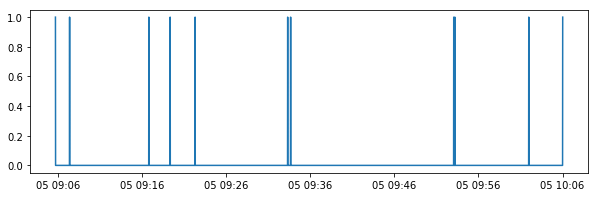

IP:  46.188.41.59
TOTAL REQS:  IP_Client       140.0
POST_Size    966724.0
dtype: float64


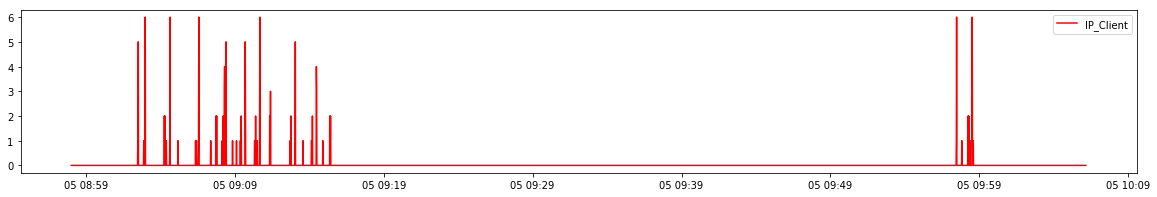

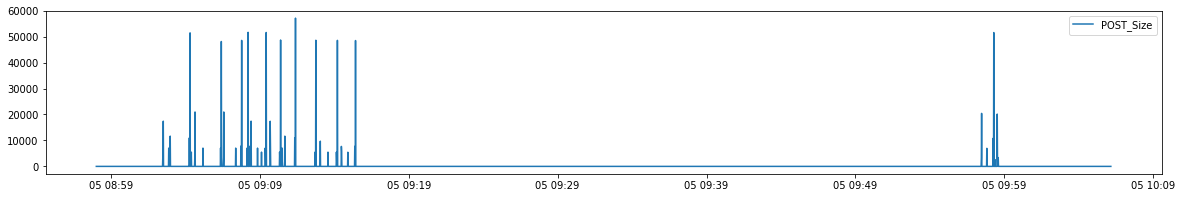

                     IP_Client
Date_Time                     
2017-09-05 09:04:18          1
2017-09-05 09:06:24          1
2017-09-05 09:07:46          1
2017-09-05 09:08:12          1
2017-09-05 09:09:25          1
2017-09-05 09:10:23          1
2017-09-05 09:11:23          1
2017-09-05 09:12:45          1
2017-09-05 09:14:12          1
2017-09-05 09:15:25          1
2017-09-05 09:58:18          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:04:18'), Timestamp('2017-09-05 09:58:18'))


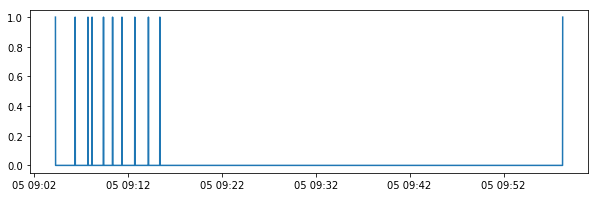

IP:  79.174.55.126
TOTAL REQS:  IP_Client       141.0
POST_Size    982750.0
dtype: float64


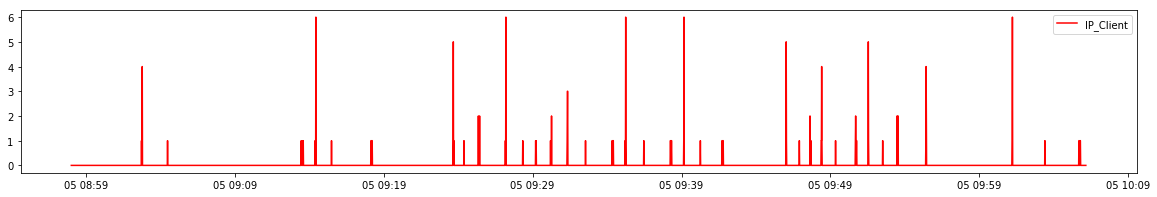

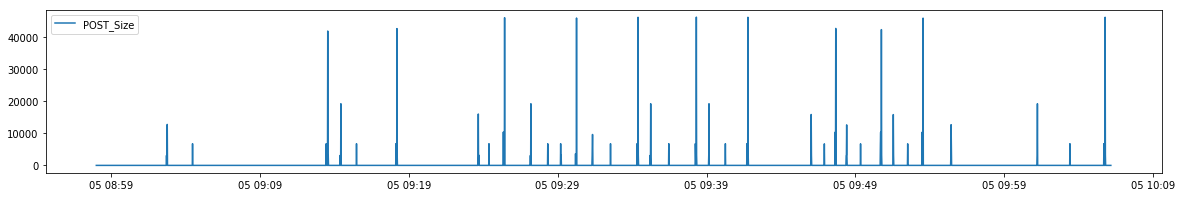

                     IP_Client
Date_Time                     
2017-09-05 09:13:33          1
2017-09-05 09:18:12          1
2017-09-05 09:25:26          1
2017-09-05 09:30:16          1
2017-09-05 09:34:24          1
2017-09-05 09:38:19          1
2017-09-05 09:41:47          1
2017-09-05 09:47:41          1
2017-09-05 09:50:45          1
2017-09-05 09:53:33          1
2017-09-05 10:05:47          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:13:33'), Timestamp('2017-09-05 10:05:47'))


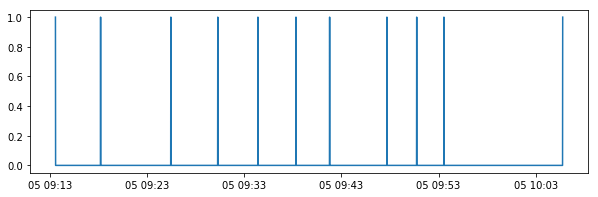

IP:  213.87.134.96
TOTAL REQS:  IP_Client       163.0
POST_Size    956230.0
dtype: float64


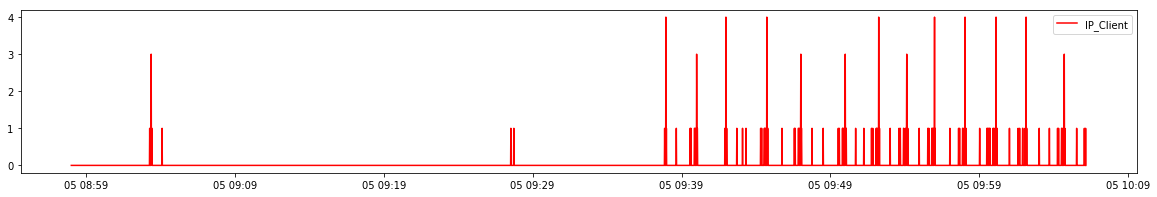

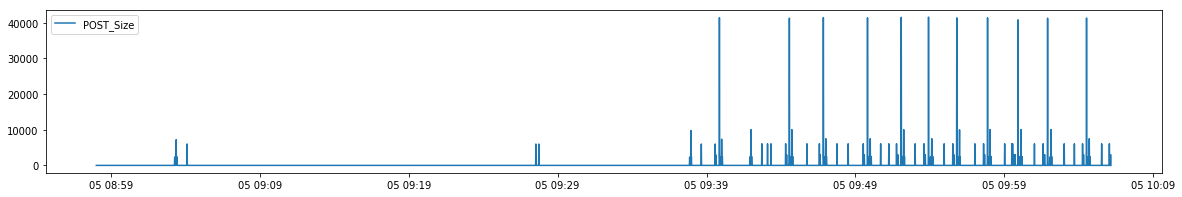

                     IP_Client
Date_Time                     
2017-09-05 09:39:52          1
2017-09-05 09:44:34          1
2017-09-05 09:46:51          1
2017-09-05 09:49:49          1
2017-09-05 09:52:05          1
2017-09-05 09:53:55          1
2017-09-05 09:55:49          1
2017-09-05 09:57:53          1
2017-09-05 09:59:56          1
2017-09-05 10:01:55          1
2017-09-05 10:04:32          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:39:52'), Timestamp('2017-09-05 10:04:32'))


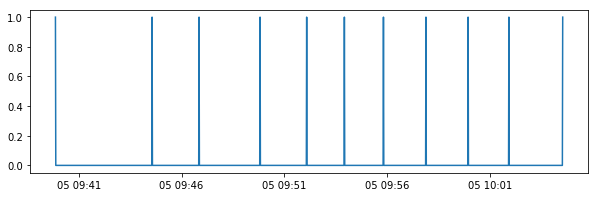

IP:  109.252.69.14
TOTAL REQS:  IP_Client       141.0
POST_Size    788889.0
dtype: float64


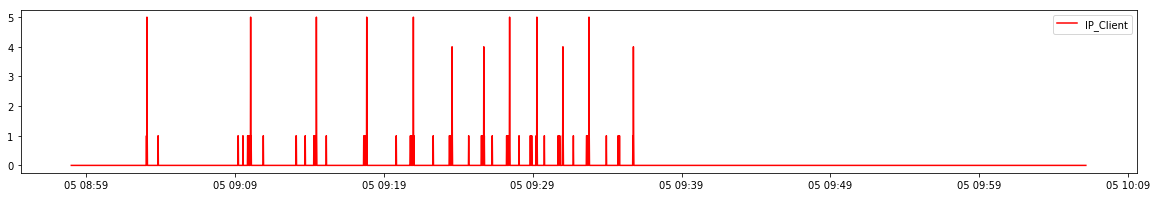

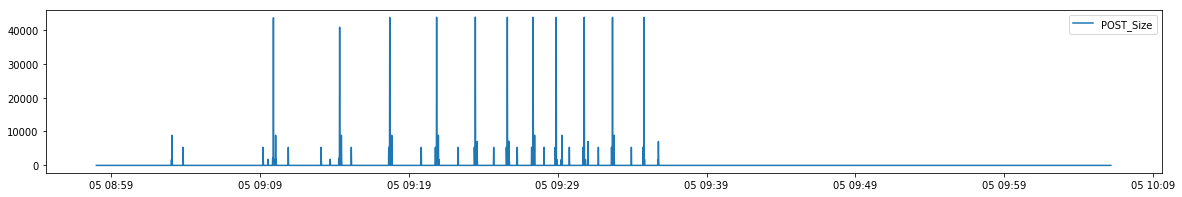

                     IP_Client
Date_Time                     
2017-09-05 09:09:54          1
2017-09-05 09:14:21          1
2017-09-05 09:17:43          1
2017-09-05 09:20:52          1
2017-09-05 09:23:28          1
2017-09-05 09:25:37          1
2017-09-05 09:27:21          1
2017-09-05 09:28:54          1
2017-09-05 09:30:47          1
2017-09-05 09:32:41          1
2017-09-05 09:34:48          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:09:54'), Timestamp('2017-09-05 09:34:48'))


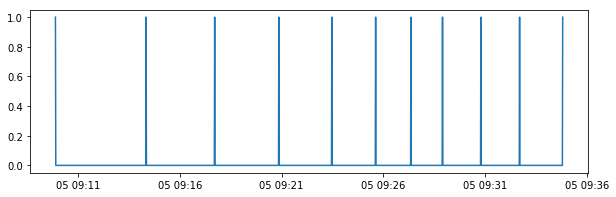

IP:  31.173.82.186
TOTAL REQS:  IP_Client       142.0
POST_Size    852622.0
dtype: float64


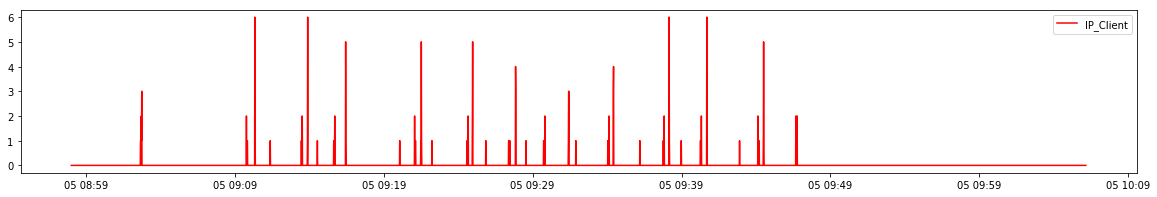

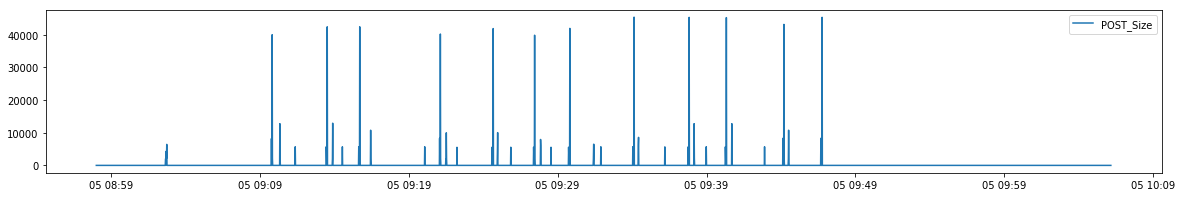

                     IP_Client
Date_Time                     
2017-09-05 09:09:49          1
2017-09-05 09:13:31          1
2017-09-05 09:15:42          1
2017-09-05 09:21:07          1
2017-09-05 09:24:40          1
2017-09-05 09:27:27          1
2017-09-05 09:29:49          1
2017-09-05 09:34:08          1
2017-09-05 09:37:50          1
2017-09-05 09:40:20          1
2017-09-05 09:44:12          1
2017-09-05 09:46:46          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:09:49'), Timestamp('2017-09-05 09:46:46'))


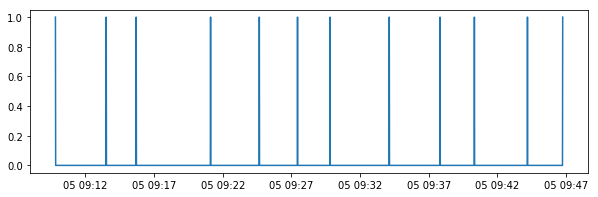

IP:  46.39.229.41
TOTAL REQS:  IP_Client       152.0
POST_Size    837047.0
dtype: float64


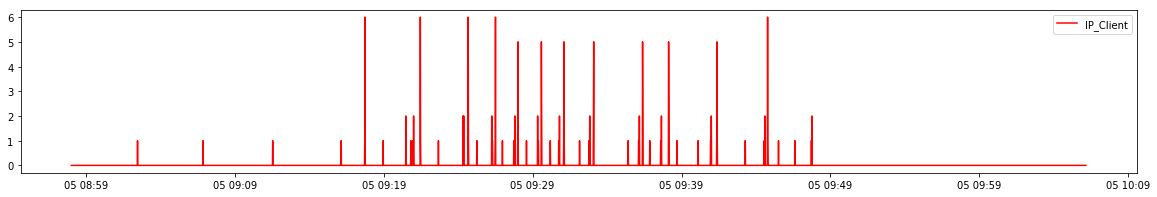

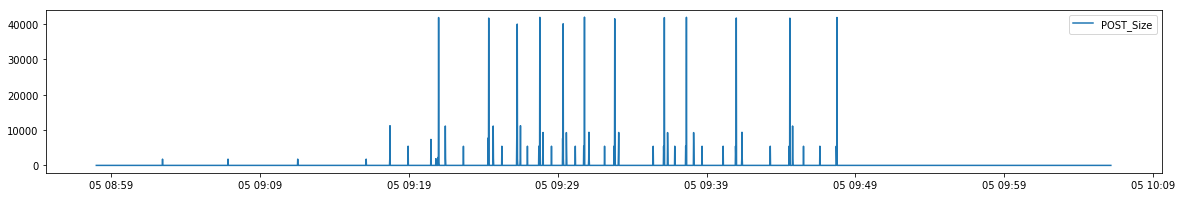

                     IP_Client
Date_Time                     
2017-09-05 09:21:00          1
2017-09-05 09:24:22          1
2017-09-05 09:26:17          1
2017-09-05 09:27:48          1
2017-09-05 09:29:22          1
2017-09-05 09:30:48          1
2017-09-05 09:32:50          1
2017-09-05 09:36:10          1
2017-09-05 09:37:39          1
2017-09-05 09:41:00          1
2017-09-05 09:44:36          1
2017-09-05 09:47:46          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:21:00'), Timestamp('2017-09-05 09:47:46'))


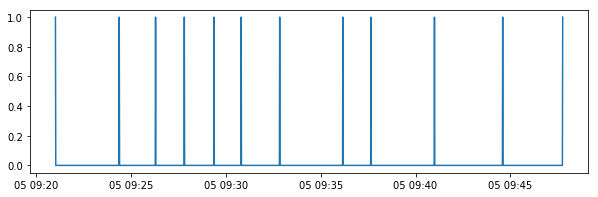

IP:  93.157.168.32
TOTAL REQS:  IP_Client       177.0
POST_Size    947661.0
dtype: float64


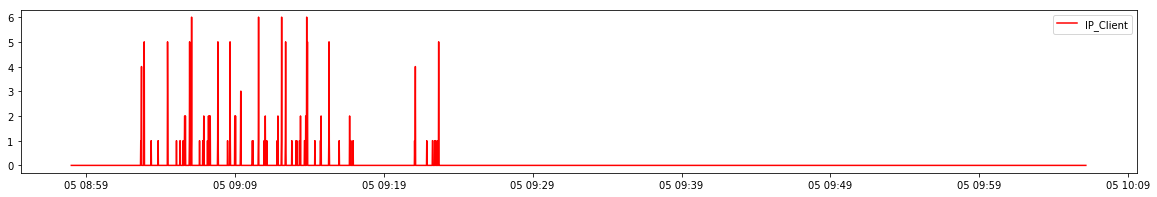

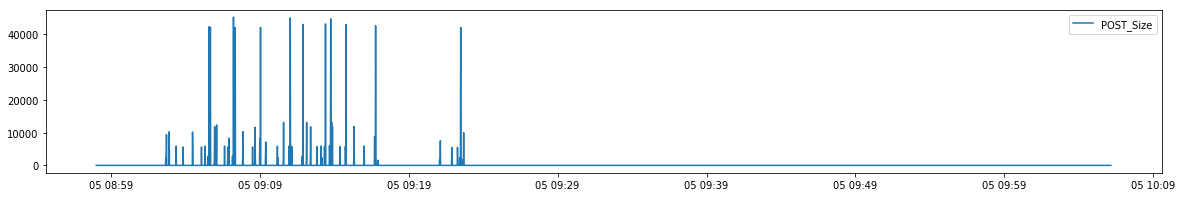

                     IP_Client
Date_Time                     
2017-09-05 09:05:35          1
2017-09-05 09:05:40          1
2017-09-05 09:07:13          1
2017-09-05 09:07:20          1
2017-09-05 09:09:02          1
2017-09-05 09:11:02          1
2017-09-05 09:11:53          1
2017-09-05 09:13:24          1
2017-09-05 09:13:45          1
2017-09-05 09:14:47          1
2017-09-05 09:16:46          1
2017-09-05 09:22:29          1
FIRST AND LAST REGS:  (Timestamp('2017-09-05 09:05:35'), Timestamp('2017-09-05 09:22:29'))


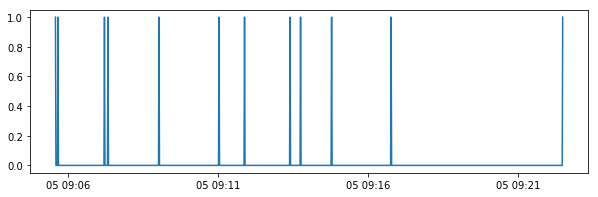

In [32]:
freq = 'S'
dr = pd.date_range('2017-09-05 08:58:00', '2017-09-05 10:06:10', freq=freq)
space = 1
for i in regs_total.sort_values().index[-120:-100:space]:
    a = dit[['IP_Client', 'Date_Time',"POST_Size"]][dit['IP_Client'] == i]
    a = a.set_index(pd.DatetimeIndex(a['Date_Time'])).drop('Date_Time', 1)
    
    a['IP_Client'] = 1
    #a = a.groupby([a.index.year, a.index.month, a.index.day, a.index.hour, a.index.minute]).sum().reset_index()
    a = a.resample(freq).sum()
    a = a.reindex(dr).fillna(0)
    
    
    
    print('IP: ', i)
    print('TOTAL REQS: ', a.sum())
    plt.figure(figsize=(20,3))
    plt.plot(a.index, a[['IP_Client']], 'r')
    plt.legend(a)
    plt.show()
    
    plt.figure(figsize=(20,3))
    plt.plot(a.index, a[['POST_Size']])
    plt.legend(a[['POST_Size']])
    plt.show()
    
    if i in regs_total.index and regs_total.loc[i] > 2:
        regs_cur = regs[(regs['IP_Client'] == i)][['IP_Client', 'Date_Time']]
        regs_cur = regs_cur.set_index(pd.DatetimeIndex(regs_cur['Date_Time'])).drop('Date_Time', 1).sort_index(axis=0)
        regs_cur['IP_Client'] = 1
        trunc = (regs_cur.index[0], regs_cur.index[-1])
        print(regs_cur)
        print('FIRST AND LAST REGS: ', trunc)
        
        regs_cur = regs_cur.resample(freq).sum()
        regs_cur = regs_cur.reindex(dr).fillna(0)
        regs_cur = regs_cur.truncate(before=trunc[0], after=trunc[1])
        
        plt.figure(figsize=(10,3))
        plt.plot(regs_cur.index, regs_cur.values)
        plt.show()    

In [9]:
a.index[0].value

1504602000000000000

# Анализ запросов

Были проанализированы запросы, связанные с регистрацией мест на ярмарке выходного дня.
Число заявок в зависимости от IP-адресов клиента увеличивается экспоненциально.
*пикча*
Трафик, приходящий на сервер mos.ru, был рассмотрен на длину POST-запроса и ответа сервера. Анализ позволяет выявить паттерн, свойственный боту: GET-запрос длиной около 3000B и длиной ответа порядка 250000B, затем несколько POST запросов по адресу /ru/application/dtiu/030301/ и, наконец, непосредственно подачу заявки - POST запрос длиной 40000B и более, и длиной ответа сервера около 8000B.
Время, прошедшее между этими запросами, приблизительно одинаково для каждой последующей заявки, произведенной ботом.
*пикча*
Аномально высокая скорость обращения на сервер также свидетельствует о подозрительной активности.
*пикча*
Блокировка пользователя с использованием только его IP-адреса, малоэффективна, поскольку она обходится его заменой (например, при помощи прокси-серверов).
Поэтому возможно отделить поведение бота от человека, используя описанный паттерн. Впоследствии, при последующем анализе входящих запросов в реальном времени, можно принимать решение касательно активности пользователя. Если частота и содержимое запросов будут соответствовать описанными ранее - блокировать пользователя.

Общее число запросов с каждого IP:
Общее число регистраций с каждого IP:
Число различных типов запросов для каждого IP:

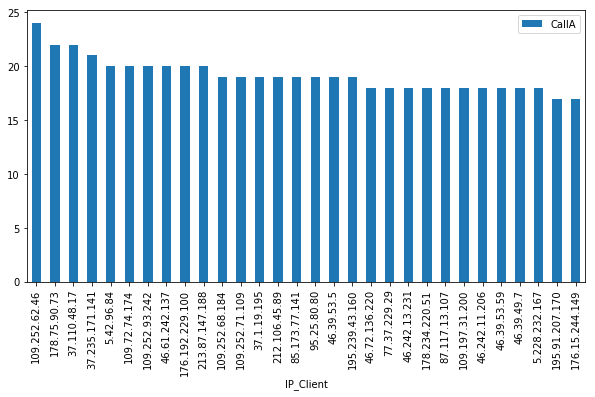

,CallA
IP_Client,
109.252.62.46,24
178.75.90.73,22
37.110.48.17,22
37.235.171.141,21
5.42.96.84,20
109.72.74.174,20
109.252.93.242,20
46.61.242.137,20
176.192.229.100,20


In [96]:
dit.groupby(['IP_Client'])['IP_Client'].count().sort_values()[-21:]

z = dit[['IP_Client', 'CallA']].set_index('IP_Client').groupby(['IP_Client']).nunique().sort_values('CallA', ascending=False)[:30]
z.plot(kind='bar', figsize=(10,5))

plt.show()
z